3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step 

d:\Venv\envs\TarRec\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(32, 128, 128, 1))
  warnings.warn(msg)
d:\Venv\envs\TarRec\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000018EAA56DD00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


d:\Venv\envs\TarRec\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_4']
Received: inputs=Tensor(shape=(32, 128, 128, 1))
  warnings.warn(msg)
d:\Venv\envs\TarRec\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_4']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.3688 - loss: 1.3716 - val_accuracy: 0.5000 - val_loss: 1.0185 - learning_rate: 0.0010
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5086 - loss: 0.8990 - val_accuracy: 0.6250 - val_loss: 0.7273 - learning_rate: 0.0010
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7250 - loss: 0.6112 - val_accuracy: 0.7083 - val_loss: 0.5579 - learning_rate: 0.0010
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8598 - loss: 0.5075 - val_accuracy: 0.8750 - val_loss: 0.4380 - learning_rate: 0.0010
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9243 - loss: 0.3519 - val_accuracy: 0.9167 - val_loss: 0.3506 - learning_rate: 0.0010
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9404 - loss: 0.3409 - val_accuracy: 0.9167 - val_loss: 0.2916 - learning_rate: 0.0010
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9301 

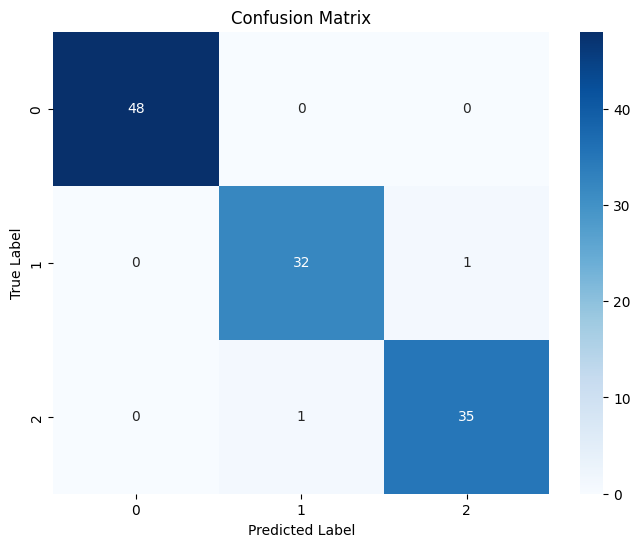

✅ 融合模型已保存为 cnn_weighted_fusion_all_model.keras


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 加载训练好的 CNN 模型
model_mfcc = load_model(r"D:\Dataset\Marine-Mammal-Target-Classification\03_CNN\cnn_MFCC_model.keras")
model_wavelet = load_model(r"D:\Dataset\Marine-Mammal-Target-Classification\03_CNN\cnn_wavelet_model_abs.keras")
model_dd = load_model(r"D:\Dataset\Marine-Mammal-Target-Classification\03_CNN\cnn_DelayDoppler_model.keras")

# 2️⃣ 提取特征层
feature_extractor_mfcc = Model(inputs=model_mfcc.inputs, outputs=model_mfcc.get_layer("dense_2").output)
feature_extractor_wavelet = Model(inputs=model_wavelet.inputs, outputs=model_wavelet.get_layer("dense_2").output)
feature_extractor_dd = Model(inputs=model_dd.inputs, outputs=model_dd.get_layer("dense_8").output)

# 3️⃣ 加载测试数据
X_test_mfcc = np.load(r"D:\Dataset\Temp_Results\MFCC\X_test_mfcc_cnn.npy")
X_test_wavelet = np.load(r"D:\Dataset\Temp_Results\Wavelet\X_test_cwt_abs.npy")
X_test_wavelet = np.expand_dims(X_test_wavelet, axis=-1)
X_test_dd = np.load(r"D:\Dataset\Temp_Results\DelayDoppler\X_test_dd_cnn.npy")
Y_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_test.npy")

# 归一化数据
X_test_mfcc = X_test_mfcc.astype(np.float32) / 255.0
X_test_wavelet = X_test_wavelet.astype(np.float32) / 255.0
X_test_dd = X_test_dd.astype(np.float32) / 255.0

# 4️⃣ 提取三个模型的特征
features_mfcc = feature_extractor_mfcc.predict(X_test_mfcc)
features_wavelet = feature_extractor_wavelet.predict(X_test_wavelet)
features_dd = feature_extractor_dd.predict(X_test_dd)

# 5️⃣ 加权融合特征（给不同特征赋予权重）
alpha, beta, gamma = 0.5, 0.3, 0.2  # 设定权重系数
fused_features = alpha * features_mfcc + beta * features_wavelet + gamma * features_dd

# 6️⃣ 处理标签
num_classes = len(np.unique(Y_test))
Y_test = to_categorical(Y_test, num_classes)

# 7️⃣ 构建融合模型
input_dim = fused_features.shape[1]
input_layer = Input(shape=(input_dim,))

x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.4)(x)
x = Dense(num_classes, activation='softmax')(x)

fusion_model = Model(inputs=input_layer, outputs=x)

# 8️⃣ 编译模型
fusion_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# 9️⃣ 训练模型
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = fusion_model.fit(fused_features, Y_test, epochs=30, batch_size=32,
                           validation_split=0.2, callbacks=[reduce_lr, early_stopping])

# 🔟 评估融合模型
test_loss, test_acc = fusion_model.evaluate(fused_features, Y_test, verbose=2)
print(f"\n✅ 融合模型测试集准确率: {test_acc:.4f}")

# 计算分类报告和混淆矩阵
Y_pred = fusion_model.predict(fused_features)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

print("\n📊 分类报告:")
print(classification_report(Y_true, Y_pred_classes))

conf_matrix = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(Y_true), yticklabels=np.unique(Y_true))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 保存最终融合模型
fusion_model.save("cnn_weighted_fusion_all_model.keras")
print("✅ 融合模型已保存为 cnn_weighted_fusion_all_model.keras")
